## Importing the required basic libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
train_data.size

1366651

In [5]:
train_data.shape

(9557, 143)

In [6]:
train_data.describe()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


#### We have float64(8), int64(130), object(5) data types in our data

### Null value treatment

In [8]:
train_data.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

#### Calculating the null values columnwise

In [9]:
train_data.isna().sum().value_counts()

0       138
5         2
6860      1
7342      1
7928      1
dtype: int64

In [10]:
A_train=pd.DataFrame(train_data.isna().sum()>6000)

In [11]:
A_train.head(50)

,0
Id,False
v2a1,True
hacdor,False
rooms,False
hacapo,False
v14a,False
refrig,False
v18q,False
v18q1,True
r4h1,False


In [12]:
B_train = train_data.drop(['v2a1','v18q1','rez_esc'],axis=1)

In [13]:
B_train.shape

(9557, 140)

In [14]:
data_train = B_train.dropna()

In [15]:
data_train.shape

(9552, 140)

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9552 entries, 0 to 9556
Columns: 140 entries, Id to Target
dtypes: float64(5), int64(130), object(5)
memory usage: 10.3+ MB


In [17]:
data_train.drop_duplicates()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,0,6,0,1,1,0,0,2,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,ID_c94744e07,0,6,0,1,1,0,0,2,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,ID_85fc658f8,0,6,0,1,1,0,0,2,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,ID_ced540c61,0,6,0,1,1,0,0,2,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


In [18]:
filling = {'yes':1, 'no':0}
data_train['dependency'] = data_train['dependency'].replace(filling).astype(np.float64)
data_train['edjefe'] = data_train['edjefe'].replace(filling).astype(np.float64)
data_train['edjefa'] = data_train['edjefa'].replace(filling).astype(np.float64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\3963868270.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['dependency'] = data_train['dependency'].replace(filling).astype(np.float64)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\3963868270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['edjefe'] = data_train['edjefe'].replace(filling).astype(np.float64)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\3963868270.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [19]:
C_train = data_train['parentesco1'].value_counts().reset_index()
C_train

,index,parentesco1
0,0,6582
1,1,2970


([<matplotlib.patches.Wedge at 0x16b646ee8b0>,
 [Text(-0.6156319532527471, 0.9115905320560364, '0'),
  Text(0.6156319532527466, -0.9115905320560368, '1')],
 [Text(-0.3357992472287711, 0.4972311993032925, '68.91%'),
  Text(0.3357992472287708, -0.49723119930329274, '31.09%')])

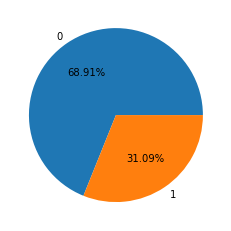

In [20]:
import matplotlib.pyplot as plt
plt.pie(C_train['parentesco1'],labels =C_train['index'], autopct ='%1.2f%%')

#### 31.09% of the parents are family head of the family

In [21]:
D_train = data_train['Target'].value_counts().reset_index()
D_train

,index,Target
0,4,5991
1,2,1597
2,3,1209
3,1,755


### Checking for biases in the data

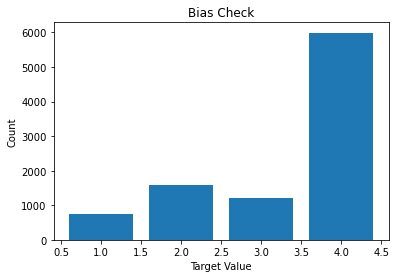

In [22]:
plt.bar(D_train['index'],D_train['Target'])
plt.title('Bias Check')
plt.xlabel('Target Value')
plt.ylabel('Count')
plt.show()

#### Looks like our data is biased towards 4 value of Target

([<matplotlib.patches.Wedge at 0x16b66857280>,
 [Text(-0.4279608820686507, 1.0133358196664237, '4'),
  Text(-0.26824300130072204, -1.0667922441849589, '2'),
  Text(0.688704068112093, -0.8577218118748373, '3'),
  Text(1.0662608433628622, -0.2703475798136873, '1')],
 [Text(-0.23343320840108217, 0.5527286289089582, '62.72%'),
  Text(-0.14631436434584838, -0.5818866786463411, '16.72%'),
  Text(0.3756567644247779, -0.4678482610226385, '12.66%'),
  Text(0.5815968236524702, -0.14746231626201123, '7.90%')])

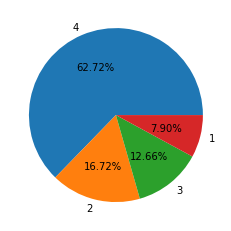

In [23]:
plt.pie(D_train['Target'],labels = D_train['index'],autopct='%1.2f%%')

#### 62.72% of datapoints are having target value 4 

In [24]:
household_head = data_train.groupby('idhogar')['parentesco1'].sum().reset_index()
household_head.shape

(2985, 2)

## Finding out the households without family head

In [25]:
household_head['parentesco1'].value_counts()

1    2970
0      15
Name: parentesco1, dtype: int64

#### There are 15 households without family head

In [26]:
powerty_level = data_train.groupby('idhogar')['Target'].sum().reset_index()
powerty_level

,idhogar,Target
0,001ff74ca,8
1,003123ec2,8
2,004616164,4
3,004983866,6
4,005905417,6
...,...,...
2980,ff9343a35,16
2981,ff9d5ab17,12
2982,ffae4a097,8
2983,ffe90d46f,4


In [27]:
data_train.head()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,0,3,0,1,1,0,0,1,1,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,0,4,0,1,1,1,0,1,1,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0,8,0,1,1,0,0,0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,0,5,0,1,1,1,0,2,2,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,0,5,0,1,1,1,0,2,2,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [28]:
x = data_train.drop(['Id','idhogar','Target'],axis=1)
y = data_train['Target']

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.265)

## Using Random forest classifier to predict household level 

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=800)

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=800)

In [32]:
y_pred = rf.predict(x_test)

In [33]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report

In [34]:
accuracy_score(y_test,y_pred)

0.9107424960505529

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.79      0.87       222
           2       0.90      0.83      0.86       415
           3       0.97      0.64      0.78       292
           4       0.90      1.00      0.95      1603

    accuracy                           0.91      2532
   macro avg       0.94      0.82      0.86      2532
weighted avg       0.91      0.91      0.91      2532



In [36]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [37]:
cm

array([[ 176,   16,    0,   30],
       [   2,  345,    4,   64],
       [   1,   21,  188,   82],
       [   3,    2,    1, 1597]], dtype=int64)

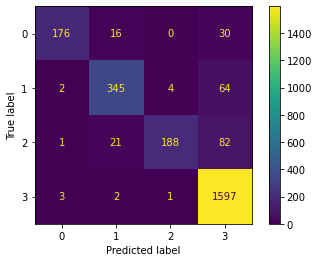

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
confusion_matrix = ConfusionMatrixDisplay(confusion_matrix=cm)
confusion_matrix.plot()

In [39]:
crosstab = pd.crosstab(y_test,y_pred)
crosstab

col_0,1,2,3,4
Target,,,,
1,176,16,0,30
2,2,345,4,64
3,1,21,188,82
4,3,2,1,1597


In [40]:
test_data = pd.read_csv('test.csv')

In [41]:
test_data.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [43]:
test_data.isna().sum().value_counts()

0        137
31         2
17403      1
18126      1
19653      1
dtype: int64

In [44]:
A_test = pd.DataFrame(test_data.isna().sum()>17000)
A_test.head(50)

,0
Id,False
v2a1,True
hacdor,False
rooms,False
hacapo,False
v14a,False
refrig,False
v18q,False
v18q1,True
r4h1,False


In [45]:
B_test = test_data.drop(['v2a1','v18q1','rez_esc'],axis=1)

In [46]:
B_test.shape

(23856, 139)

In [47]:
data_test = B_test.dropna()

In [48]:
data_test.shape

(23825, 139)

In [49]:
data_test['dependency'] = data_test['dependency'].replace(filling).astype(np.float64)
data_test['edjefe'] = data_test['edjefe'].replace(filling).astype(np.float64)
data_test['edjefa'] = data_test['edjefa'].replace(filling).astype(np.float64)

C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\2576441601.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['dependency'] = data_test['dependency'].replace(filling).astype(np.float64)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\2576441601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['edjefe'] = data_test['edjefe'].replace(filling).astype(np.float64)
C:\Users\Admin\AppData\Local\Temp\ipykernel_14484\2576441601.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [50]:
data_test.drop_duplicates()

,Id,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,0,5,0,1,1,0,1,1,2,...,4,0,16,9,0,1,2.25,0.25,272.2500,16
1,ID_1c78846d2,0,5,0,1,1,0,1,1,2,...,41,256,1681,9,0,1,2.25,0.25,272.2500,1681
2,ID_e5442cf6a,0,5,0,1,1,0,1,1,2,...,41,289,1681,9,0,1,2.25,0.25,272.2500,1681
3,ID_a8db26a79,0,14,0,1,1,1,0,1,1,...,59,256,3481,1,256,0,1.00,0.00,256.0000,3481
5,ID_e77d38d45,0,3,0,1,1,1,0,0,0,...,38,256,1444,4,0,0,1.00,0.00,182.2500,1444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23851,ID_a065a7cad,1,2,1,1,1,0,0,2,2,...,10,9,100,36,25,4,36.00,0.25,33.0625,100
23852,ID_1a7c6953b,0,3,0,1,1,0,0,1,1,...,54,36,2916,16,36,4,4.00,1.00,36.0000,2916
23853,ID_07dbb4be2,0,3,0,1,1,0,0,1,1,...,12,16,144,16,36,4,4.00,1.00,36.0000,144
23854,ID_34d2ed046,0,3,0,1,1,0,0,1,1,...,12,25,144,16,36,4,4.00,1.00,36.0000,144


In [51]:
x1_test = data_test.drop(['Id','idhogar'],axis=1)
x1_test.head()

,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h2,r4h3,r4m1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,0,5,0,1,1,0,1,1,2,0,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,0,5,0,1,1,0,1,1,2,0,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,0,5,0,1,1,0,1,1,2,0,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,0,14,0,1,1,1,0,1,1,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
5,0,3,0,1,1,1,0,0,0,0,...,38,256,1444,4,0,0,1.00,0.00,182.25,1444


## Using test data predicting final household level

In [52]:
y_pred_final = rf.predict(x1_test)

In [53]:
Final_Target = pd.DataFrame(y_pred_final)

In [54]:
Final_Target

,0
0,4
1,4
2,4
3,4
4,4
...,...
23820,3
23821,4
23822,2
23823,2
